<a href="https://colab.research.google.com/github/nidhin-koshy/ML_AI_IISc/blob/master/52_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks

In this module we will look at two artificial neural networks (ANN) for classifying three different image datasets. We will see that two grayscale image datasets (MNIST, Fashion-MNIST) can be classified with very high accuracy using a simple 3-layer neural network. However, for the third satellite image dataset (Eurosat), the simple 3-layer network is not sufficient. We will see that a more complex network significantly improves the performance.



## MNIST image classification

In this section we will use a simple artifical neural network (ANN) to classify the MNIST dataset. We already tried to classify this dataset using logistic regression and SVM classifier. SVM already gave an accuracy of 0.95. We will see that the below given ANN is able to improve the performance, albeit marginally.

The particular ANN network was taken from Tensorflow tutorial page : https://www.tensorflow.org/tutorials

Training set size =  (60000, 28, 28)
Test set size =  (10000, 28, 28)


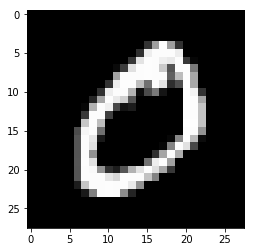

In [1]:
import tensorflow as tf #import tensorflow. Tensorflow is a module developed by Google, particularly for implementing deep neural netowrks.
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist # Keras is a set of deep learning APIs that tries to provide a unified API interface for deep learning.
# Load the MNIST dataset using the inbuilt functionality available in keras.

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


print("Training set size = ", x_train.shape)
print("Test set size = ", x_test.shape)
index = 1
plt.imshow(x_train[index],cmap='gray')

In [2]:
# First we define the structure of the neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

W0802 05:56:55.310997 140541773711232 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2202 - acc: 0.9355
Epoch 2/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0960 - acc: 0.9701
Epoch 3/5
60000/60000 [=====================

[0.06974963880805299, 0.9804]

# Fashion MNIST datset

Training set size =  (60000, 28, 28)
Test set size =  (10000, 28, 28)


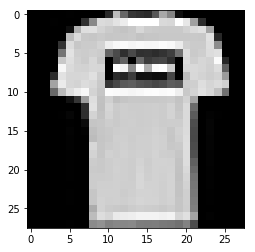

In [3]:

fashion_mnist = tf.keras.datasets.fashion_mnist # Keras is a set of deep learning APIs that tries to provide a unified API interface for deep learning.
# Load the fashion_MNIST dataset using the inbuilt functionality available in keras.

(x_train_fm, y_train_fm),(x_test_fm, y_test_fm) = fashion_mnist.load_data()
x_train_fm, x_test_fm = x_train_fm / 255.0, x_test_fm / 255.0

print("Training set size = ", x_train_fm.shape)
print("Test set size = ", x_test_fm.shape)
index = 1
plt.imshow(x_train_fm[index],cmap='gray')



In [4]:

model.fit(x_train_fm, y_train_fm, epochs=5)
model.evaluate(x_test_fm, y_test_fm)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.5240 - acc: 0.8175
Epoch 2/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3863 - acc: 0.8586
Epoch 3/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3523 - acc: 0.8690
Epoch 4/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3307 - acc: 0.8781
Epoch 5/5
10000/10000 [==============================] - 1s 54us/sample - loss: 0.3473 - acc: 0.8759


[0.34731047382354735, 0.8759]

# Eurosat Dataset
Eurosat is a satellite image dataset for different land use labels. The aim is to classify an image to its correct land use label.

The source of the dataset : http://madm.dfki.de/downloads

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile # import module to unzip the data
import cv2

In [0]:
os.system("wget -N 'http://madm.dfki.de/files/sentinel/EuroSAT.zip'")
zf = zipfile.ZipFile("EuroSAT.zip")
zf.extractall()

['Highway_2018.jpg', 'Highway_1317.jpg', 'Highway_1818.jpg', 'Highway_453.jpg', 'Highway_286.jpg']
['SeaLake_1292.jpg', 'SeaLake_404.jpg', 'SeaLake_1563.jpg', 'SeaLake_149.jpg', 'SeaLake_1613.jpg']
['Industrial_2396.jpg', 'Industrial_824.jpg', 'Industrial_1234.jpg', 'Industrial_1900.jpg', 'Industrial_202.jpg']
['HerbaceousVegetation_921.jpg', 'HerbaceousVegetation_1509.jpg', 'HerbaceousVegetation_2385.jpg', 'HerbaceousVegetation_1607.jpg', 'HerbaceousVegetation_2452.jpg']
['Residential_88.jpg', 'Residential_2073.jpg', 'Residential_601.jpg', 'Residential_44.jpg', 'Residential_140.jpg']
['PermanentCrop_6.jpg', 'PermanentCrop_496.jpg', 'PermanentCrop_328.jpg', 'PermanentCrop_2187.jpg', 'PermanentCrop_722.jpg']
['River_724.jpg', 'River_1995.jpg', 'River_1736.jpg', 'River_1095.jpg', 'River_1946.jpg']
['AnnualCrop_514.jpg', 'AnnualCrop_248.jpg', 'AnnualCrop_237.jpg', 'AnnualCrop_2212.jpg', 'AnnualCrop_1116.jpg']
['Forest_2709.jpg', 'Forest_2413.jpg', 'Forest_1598.jpg', 'Forest_1615.jpg', 'Fo

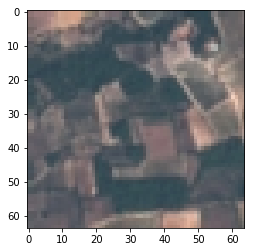

In [7]:
main_dir = '2750'
folder_list = os.listdir(main_dir)
image_list=[]
for folder in folder_list:
  file_list = os.listdir(main_dir+'/'+folder)
  print(file_list[:5])
test_image = cv2.imread('2750/PermanentCrop/PermanentCrop_395.jpg')
print(test_image.shape)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [0]:
num_images_per_class = 1000

main_dir = '2750'
folder_list = os.listdir(main_dir)
image_list=[]
image_list_3D=[]
label_list=[]
label=-1
for folder in folder_list:
  file_list = os.listdir(main_dir+'/'+folder)
  count=0
  for file_name in file_list:
    if(count<num_images_per_class):
      if(count==0): label+=1 
      label_list.append(label)
      count+=1
      full_file_name=main_dir+'/'+folder+'/'+file_name
      image = cv2.imread(full_file_name)
      #image = cv2.resize(image,(32,32))
      image_list.append(image.flatten().astype('float32')/255)
      image_list_3D.append(image.astype('float32')/255)

In [9]:
from sklearn.model_selection import train_test_split # we will split the available data into training and test data for validating the model

x_data_3D = image_list_3D #  image data as 
y_data = label_list

#x_data = scaler.fit_transform(x_data) # normalize data

x_train_3D, x_test_3D, y_train, y_test = train_test_split(x_data_3D, y_data, test_size=0.4,random_state=42)

x_train_3D = np.array(x_train_3D).reshape(-1,64, 64, 3)   #Reshape for CNN -  should work!!
x_test_3D = np.array(x_test_3D).reshape(-1,64, 64, 3)

from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

Using TensorFlow backend.


## Using the simple 3-layer neural network for Eurosat data 

In [10]:
model_eurosat = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(64, 64,3)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_eurosat.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_eurosat.summary()
model_eurosat.fit(x_train_3D, y_train, epochs=5)
model_eurosat.evaluate(x_test_3D, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 6,297,098
Trainable params: 6,297,098
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
6000/6000 [==============================] - 8s 1ms/sample - loss: 2.5657 - acc: 0.2012
Epoch 2/5
6000/6000 [==============================] - 8s 1ms/sample - loss: 1.8960 - acc: 0.2430
Epoch 3/5
6000/6000 [=========================

[1.6867974586486816, 0.3575]

##  Convolution neural network (CNN) for image classification
We will now try to use a more complex neural network structure to classify the images. We see significant improvement in  accuracy for the new model. This suggests that different problems require different neural networks.

Source of CNN - https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb

A better solution (99% accuracy) based on a more complex network is available here - https://github.com/reidfalconer/landcover_classification


In [0]:
model_conv2D = tf.keras.models.Sequential()
model_conv2D.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model_conv2D.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_conv2D.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_conv2D.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_conv2D.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_conv2D.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_conv2D.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_conv2D.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_conv2D.add(tf.keras.layers.Flatten())
model_conv2D.add(tf.keras.layers.Dense(512, activation='relu'))
model_conv2D.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [12]:
model_conv2D.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_conv2D.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)        

In [13]:
model_conv2D.fit(x_train_3D, y_train, epochs=5)
model_conv2D.evaluate(x_test_3D, y_test)

Epoch 1/5
6000/6000 [==============================] - 43s 7ms/sample - loss: 1.6494 - acc: 0.3317
Epoch 2/5
6000/6000 [==============================] - 43s 7ms/sample - loss: 1.2560 - acc: 0.5112
Epoch 3/5
6000/6000 [==============================] - 43s 7ms/sample - loss: 1.0463 - acc: 0.6170
Epoch 4/5
6000/6000 [==============================] - 43s 7ms/sample - loss: 0.9499 - acc: 0.6598
Epoch 5/5
4000/4000 [==============================] - 8s 2ms/sample - loss: 0.7408 - acc: 0.7433


[0.7407881898880004, 0.74325]